# CITIBIKE-NYC PROJECT (Insight Technical Interview)

# 1. Introduction
__Maikol Cerda__

Postdoc Fellow, Yale University (2019-)

Ph.D. in Economics, New York University (2014-2019)

In [56]:
from IPython.display import Image

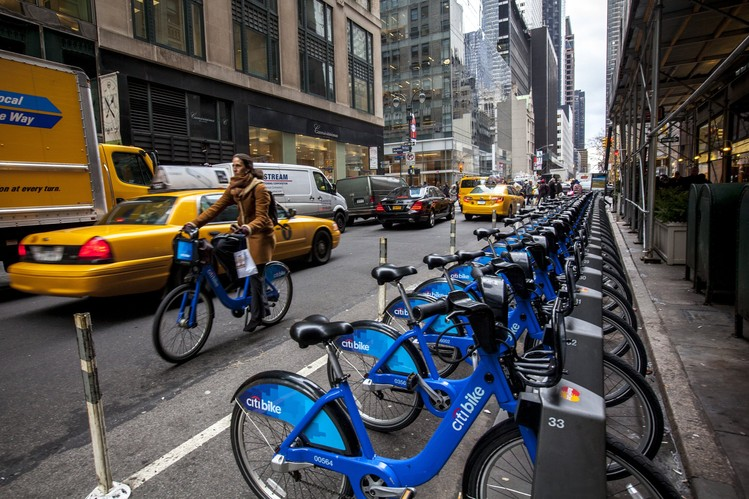

In [1]:
img_city_1 = 'C:/Users/Maikol Cerda/Desktop/city1.jpg'
Image(filename=img_city_1)

# 2. Today's Goal 
### a. Understand the Dynamics of the Demand and Demand's Forecasting


$$ \text{For } y \in \mathbb{R} \text{,     } y=number-of-trips=f(x) = f\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
     number-of-visitors  \\
     temperature  \\
    rain  \\
    other-transportation-methods  \\
    season - gender - others \\
\end{pmatrix}\tag{1} $$

# 3. Big goal: Micro-Geo Analysis 
### a. Optimize citibank service in New York City
### b. Quantify the impact of bike-paths on the City's Development

https://www.citibikenyc.com/blog/major-citi-bike-expansion-map-revealed

"City releases boundaries of Citi Bike’s next expansion, which will double the current service area by 35 square miles and triple the number of bikes to 40,000; System will expand to a diverse range of communities, including the South Bronx and northern Manhattan in the next year...."

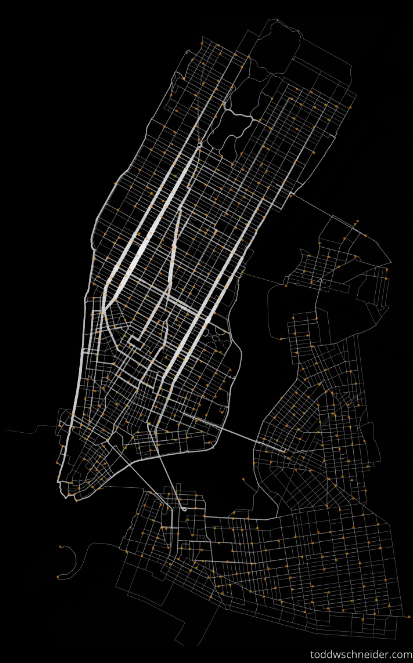

In [152]:
img_city_2 = 'C:/Users/Maikol Cerda/Desktop/city2.png'
Image(filename=img_city_2)

# 4. Databases Descriptions

## a. Citibike Trips' Data (trip-daily)

[https://www.citibikenyc.com/system-data](https://www.citibikenyc.com/system-data)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| cvs files      | 60 monthly items | 2015-2019, 13.6GB |
| ------------- |__Features__| -----:|
|trip duration	| start time |	stop time|	
|start station id	| start station name	|start station lat/lon|
|end station id |	end station name	| end station lat/lon|	
|bike id | 	 birth year |	gender |


## b. Taxis and Ridesharing Trips' Data (monthly and trip-daily)

TLC Trip Record Data

[https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| cvs files      | 60 monthly items | 2015-2019, 0.8GB, 2GB |
| ------------- |__Features__| -----:|
|License Class |	Trips Per Day |		Unique Vehicles	Vehicles Per Day	| 
|Avg Days Vehicles on Road	|Avg Hours Per Day Per Vehicle|	Avg Days Drivers on Road|	
|Avg Hours Per Day Per Driver|	Avg Minutes Per Trip	|Percent of Trips Paid with Credit Card	|


## c. Weather's Data (daily)

Weather Undergraund

[https://www.wunderground.com/history/monthly/us/ny/new-york-city/KLGA/date/2019-10](https://www.wunderground.com/history/monthly/us/ny/new-york-city/KLGA/date/2019-10)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| web scraping      | 60 monthly items | 2015-2019, 1.5GB |
| ------------- |__Features (max, min, av)__| -----:|
|T (° F) |	Dew Point (° F)	| Humidity (%) |	
|Wind Speed (mph) |	Pressure (Hg)	| Precipitation (in) |


## d. Tourists-Passengers' Data (monthly)

Airport Traffic Report, Porth Authority NY-NJ

[https://www.panynj.gov/airports/en/statistics-general-info.html](https://www.panynj.gov/airports/en/statistics-general-info.html)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| pdf files      | 5 yearly items | 2015-2019, 40MB |
| ------------- |__Features __| -----:|
|Domestic Pass. |	International Pass.	| Others |	


## e. Pollution' Data (daily)

United States Environmental Protection Agency

[https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| csv files      | 5 yearly items | 2015-2019, 100MB |
| ------------- |__Features __| -----:|
|Main Pollutants |	Station	| Overall AQI |	


## f. Rental prices 2bd (monthly, neighborhood)

StreetEasy Data Dashboard

[https://streeteasy.com/blog/data-dashboard/?agg=Total&metric=Inventory&type=Rentals&bedrooms=Two%20Bedroom&property=Any%20Property%20Type&minDate=2010-01-01&maxDate=2020-01-01&area=Flatiron,Brooklyn%20Heights)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| csv files      | 10 year monthly items | 2010-2019, 22kb |
| ------------- |__Features __| -----:|
|Neighborhood |	Borough	| Avg. price |	

In [1]:
#Importing Initial Relevant Packages
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib import pyplot

import seaborn as sns
%matplotlib inline 

import numpy as np
import pandas as pd

from scipy.stats import describe
from sklearn import preprocessing

import datetime as dt
import sklearn.linear_model as lm

## I. Data Wrangling

### 1. APPENDING 60 CITIBIKE DATABASE

In [4]:
import os
import csv

pathName = "C:/Users/Maikol Cerda/Documents/MAIKOL/1.- Academicos/7.- YALE Postdoc/4.- Data Incubator Application/Transit/Citibank trips/Citibank trips/"

#Creating a list with the name of csv files in pathName
numFiles = []
fileNames = os.listdir(pathName)
for fileNames in fileNames:
    if fileNames.endswith(".csv"):
        numFiles.append(fileNames)

numFiles=np.asarray(numFiles)

In [3]:
##a. Loop to append csv files (HEAVY: time consuming)
#Appendind the rest of the csv files (HEAVY)
for i in numFiles[1:]:
    file = pd.read_csv(os.path.join(pathName, i))
    base = base.append(file)

NameError: name 'base' is not defined

In [62]:
##b. Appending csv files MANUALLY
base = pd.read_csv(os.path.join(pathName, numFiles[59]))
base.rename(columns = {'Trip Duration':'tripduration', 'Start Time': 'starttime'}, inplace = True)

base=base[['tripduration','starttime']]
#base['starttime'] = pd.to_datetime(base['starttime'], infer_datetime_format=True)
#base['date']=base['starttime'].dt.date
#base=base.groupby(['date']).count()

In [63]:
#Create the second csv
#base = pd.read_csv(os.path.join(pathName, numFiles[11]))
#base.rename(columns = {'Trip Duration':'tripduration', 'Start Time': 'starttime'}, inplace = True)

In [64]:
#Initial base_total (only)
#df_total=base['tripduration']
#df=base

In [65]:
#Appending the difference subsets of data
#df_total=df_total.append(base['tripduration'])
df=df.append(base)
df.tail()

,tripduration,starttime
955205,93,2019-12-31 23:58:18.0160
955206,786,2019-12-31 23:58:59.8960
955207,351,2019-12-31 23:59:03.6950
955208,1571,2019-12-31 23:59:21.3610
955209,310,2019-12-31 23:59:55.2960


### 2. INITIAL LOOK AT THE DATA

In [76]:
df.reset_index(inplace=True, drop=True) 
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [66]:
#Saving data
df.to_csv('df_hour3.csv')

### 3. STRING - DATATIME TRANSFORMATION

In [ ]:
#Transforming string into datatime

#base_total['starttime']=pd.to_datetime(base_total['starttime'], format="%m/%d/%Y  %H:%M")
#base_total['stoptime']=pd.to_datetime(base_total['stoptime'], format="%m/%d/%Y  %H:%M")

df['starttime'] = pd.to_datetime(df['starttime'], infer_datetime_format=True)
df['stoptime'] = pd.to_datetime(df['stoptime'], infer_datetime_format=True)

In [155]:
#TYPE OF DATA BY COLUMN
df.dtypes

Unnamed: 0                           int64
tripduration                         int64
starttime                   datetime64[ns]
stoptime                    datetime64[ns]
start station id                     int64
start station name                  object
start_station_latitude             float64
start_station_longitude            float64
end station id                       int64
end station name                    object
end station latitude               float64
end station longitude              float64
bikeid                               int64
usertype                            object
birth year                         float64
gender                               int64
month                                int64
year                                 int64
day_of_week                          int64
hour_of_day                          int64
day_of_year                          int64
start station id shifter           float64
bike_moved                            bool
dtype: obje

### 4. MISSING DATA ANALYSIS

In [159]:
#Looking for na
df2.replace("?", np.nan, inplace = True)

missing_data = df2.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

date
False    180
Name: date, dtype: int64

date.1
False    180
Name: date.1, dtype: int64

time
False    180
Name: time, dtype: int64

season
False    180
Name: season, dtype: int64

year
False    180
Name: year, dtype: int64

total_trips
False    180
Name: total_trips, dtype: int64

avg_trip_duration
False    180
Name: avg_trip_duration, dtype: int64

Gender
False    180
Name: Gender, dtype: int64

dom_passengers
False    180
Name: dom_passengers, dtype: int64

int_passengers
False    180
Name: int_passengers, dtype: int64

T_Max
False    180
Name: T_Max, dtype: int64

T_Avg
False    180
Name: T_Avg, dtype: int64

T_Min
False    180
Name: T_Min, dtype: int64

H_Max
False    180
Name: H_Max, dtype: int64

H_Avg
False    180
Name: H_Avg, dtype: int64

H_Min
False    180
Name: H_Min, dtype: int64

W_Max
False    180
Name: W_Max, dtype: int64

W_Avg
False    180
Name: W_Avg, dtype: int64

W_Min
False    180
Name: W_Min, dtype: int64

Rain
False    180
Name: Rain, dtype: int64

rd_trips_p

In [160]:
#REPLACING MISSING VALUES
avg_dom_pass = df2["dom_passengers"].astype("float").mean(axis=0)
avg_int_pass = df2["int_passengers"].astype("float").mean(axis=0)
avg_dom_pass = df2["rd_trips_per_day"].astype("float").mean(axis=0)
avg_int_pass = df2["rd_vehicles_per_day"].astype("float").mean(axis=0)
avg_dom_pass = df2["rd_unique_drives"].astype("float").mean(axis=0)

df2["dom_passengers"].replace(np.nan, avg_dom_pass, inplace=True)
df2["int_passengers"].replace(np.nan, avg_dom_pass, inplace=True)
df2["rd_trips_per_day"].replace(np.nan, avg_dom_pass, inplace=True)
df2["rd_vehicles_per_day"].replace(np.nan, avg_dom_pass, inplace=True)
df2["rd_unique_drives"].replace(np.nan, avg_dom_pass, inplace=True)

In [161]:
#MISSING DATA POST ANALYSIS
missing_data = df2.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

date
False    180
Name: date, dtype: int64

date.1
False    180
Name: date.1, dtype: int64

time
False    180
Name: time, dtype: int64

season
False    180
Name: season, dtype: int64

year
False    180
Name: year, dtype: int64

total_trips
False    180
Name: total_trips, dtype: int64

avg_trip_duration
False    180
Name: avg_trip_duration, dtype: int64

Gender
False    180
Name: Gender, dtype: int64

dom_passengers
False    180
Name: dom_passengers, dtype: int64

int_passengers
False    180
Name: int_passengers, dtype: int64

T_Max
False    180
Name: T_Max, dtype: int64

T_Avg
False    180
Name: T_Avg, dtype: int64

T_Min
False    180
Name: T_Min, dtype: int64

H_Max
False    180
Name: H_Max, dtype: int64

H_Avg
False    180
Name: H_Avg, dtype: int64

H_Min
False    180
Name: H_Min, dtype: int64

W_Max
False    180
Name: W_Max, dtype: int64

W_Avg
False    180
Name: W_Avg, dtype: int64

W_Min
False    180
Name: W_Min, dtype: int64

Rain
False    180
Name: Rain, dtype: int64

rd_trips_p

### 5. SAVING AND READING CLEAN DATA

In [ ]:
#Saving the clean data
df.to_csv('clean_df.csv')

In [5]:
#reading data
path_1 = "C:/Users/Maikol Cerda/Desktop/clean_df.csv"
df=pd.read_csv(path_1)

In [6]:
df.shape

(9937969, 16)

## II. Initial Idea: Re-balancing Bikes

In [162]:
#Counting Bikes Moved
df['start station id shifter'] = df.groupby(['bikeid'])['start station id'].shift(-1)
df['bike_moved']=(df['end station id'] != df['start station id shifter'])
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start_station_latitude,start_station_longitude,end station id,end station name,...,usertype,birth year,gender,month,year,day_of_week,hour_of_day,day_of_year,start station id shifter,bike_moved
0,0,1346,2015-01-01 00:01:00,2015-01-01 00:24:00,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,...,Subscriber,1960.0,2,1,2015,3,0,1,265.0,False
1,1,363,2015-01-01 00:02:00,2015-01-01 00:08:00,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,...,Subscriber,1963.0,1,1,2015,3,0,1,482.0,False
2,2,346,2015-01-01 00:04:00,2015-01-01 00:10:00,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,...,Subscriber,1974.0,1,1,2015,3,0,1,505.0,False
3,3,182,2015-01-01 00:04:00,2015-01-01 00:07:00,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,...,Subscriber,1969.0,1,1,2015,3,0,1,399.0,False
4,4,969,2015-01-01 00:05:00,2015-01-01 00:21:00,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,...,Subscriber,1977.0,1,1,2015,3,0,1,432.0,False


In [163]:
group_month=df.groupby(['month','year']).sum()/df.groupby(['month','year']).count()
group_month=pd.DataFrame(group_month['bike_moved'][:11]*100)
group_month['month']=[1,2,3,4,5,6,7,8,9,10,11]
group_month['stations']=[327,328,327,320,319,324,325,412,442,450,465]

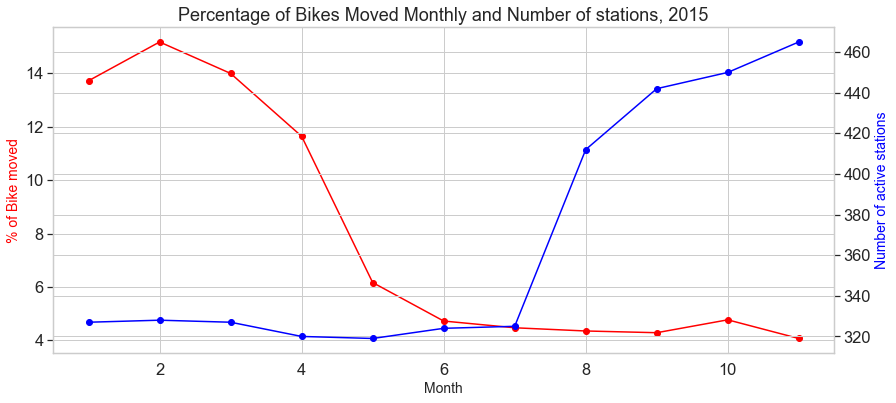

In [200]:
# create figure and axis objects with subplots()

sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(14,6))
# make a plot
ax.plot(group_month.month, group_month['bike_moved'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_ylabel("% of Bike moved",color="red",fontsize=14)
plt.title('Percentage of Bikes Moved Monthly and Number of stations, 2015')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(group_month.month, group_month["stations"],color="blue",marker="o")
ax2.set_ylabel("Number of active stations",color="blue",fontsize=14)
plt.show()

## III. Analysis of the Demand

### 1. Long-term and Seasonalities

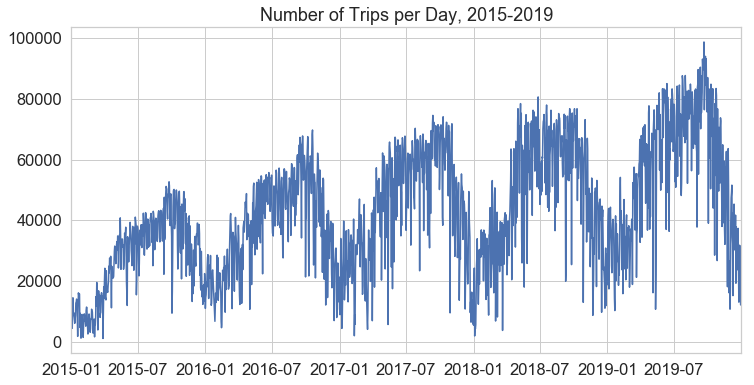

In [274]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
df_total.plot(kind='line')

plt.title('Number of Trips per Day, 2015-2019')
plt.ylabel('')
plt.xlabel('')

plt.show()

In [6]:
#Analyzing Seasonality
df['month']=df['starttime'].apply(lambda x: x.month)
df['year']=df['starttime'].apply(lambda x: x.year)

df['day_of_week']=df['starttime'].dt.dayofweek
df['hour_of_day']=df['starttime'].dt.hour
df['day_of_year'] = df['starttime'].dt.dayofyear

In [13]:
group_day_week=df.groupby(['day_of_week']).count()
group_day_week=group_day_week['tripduration']/53
group_day_week.index = ['Monday','Tuesday','Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday']

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

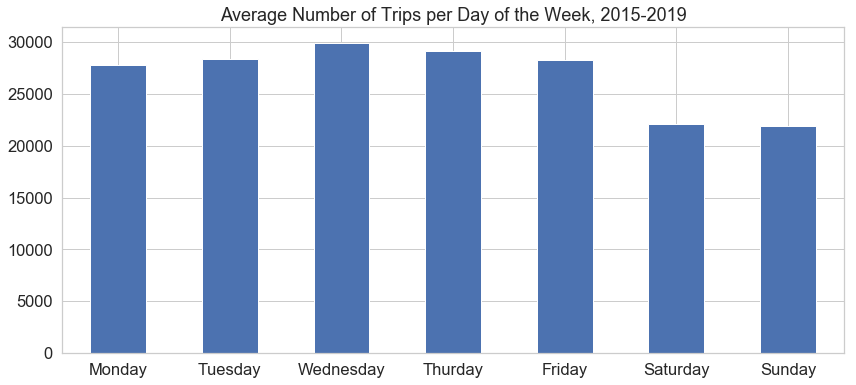

In [14]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
group_day_week.plot(kind='bar')

plt.title('Average Number of Trips per Day of the Week, 2015-2019')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)

In [18]:
group_month=df.groupby(['month']).count()
group_month=group_month['tripduration']
group_month.index = ['January','February','March','April', 'May', 'June', 'July','August'
                    , 'September', 'October', 'November', 'December']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

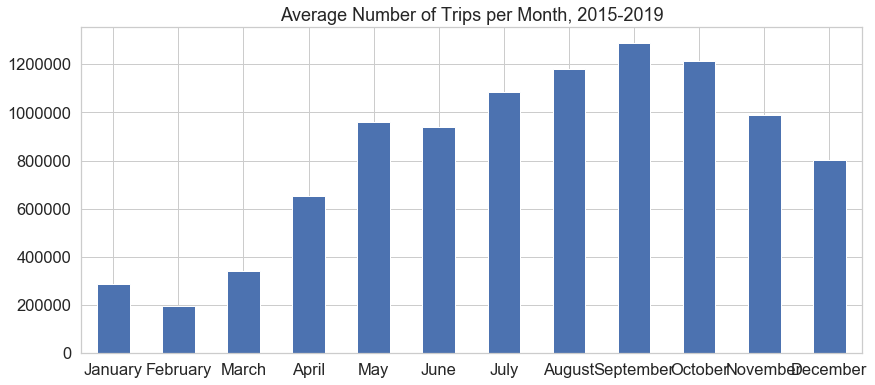

In [19]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
group_month.plot(kind='bar')

plt.title('Average Number of Trips per Month, 2015-2019')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)

In [16]:
group_hour_day=df.groupby(['hour_of_day']).count()
group_hour_day=group_hour_day['tripduration']/365

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

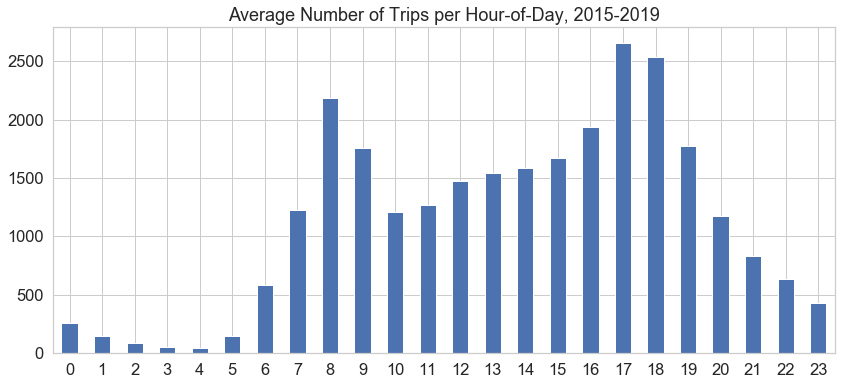

In [17]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
group_hour_day.plot(kind='bar')

plt.title('Average Number of Trips per Hour-of-Day, 2015-2019')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)

### 2. Macro Factors Impacting Demand

In [157]:
# Read the Example1.txt
path_1 = "C:/Users/Maikol Cerda/Desktop/citibike_data.csv"
df2=pd.read_csv(path_1)
df2.head()

,date,date.1,time,season,year,total_trips,avg_trip_duration,Gender,dom_passengers,int_passengers,...,W_Max,W_Avg,W_Min,Rain,rd_trips_per_day,rd_vehicles_per_day,rd_unique_drives,taxi_trips_per_day,taxi_vehicles_per_day,taxi_unique_drives
0,15-Jan,1/1/2015,1,winter,2015,5695,1576.648464,Female,39903.0,18087.0,...,20.677419,12.522581,5.354839,0.152581,87766.0,12044.0,21302.0,459897,17219,38155
1,15-Feb,2/1/2015,2,winter,2015,2303,1460.534086,Female,37358.0,16130.0,...,20.392857,12.021429,4.392857,0.072857,109041.0,13541.0,22084.0,500875,17702,37849
2,15-Mar,3/1/2015,3,winter,2015,12935,1812.818864,Female,44183.0,19108.0,...,19.032258,10.706452,3.129032,0.141935,104691.0,13480.0,23148.0,486236,17865,38864
3,15-Apr,4/1/2015,4,spring,2015,66373,1965.599807,Female,44814.0,20070.0,...,20.466667,11.440000,3.233333,0.028333,129150.0,17953.0,30808.0,491174,18130,38962
4,15-May,5/1/2015,5,spring,2015,167866,1888.198766,Female,45160.0,20545.0,...,17.483871,9.361290,2.419355,0.010645,136517.0,15399.0,32886.0,482096,18183,38955


#### 2.1 Descriptive Statistics Analysis, Creation of Dummy Variables and Data Normalization

In [8]:
df2.describe()

,time,year,total_trips,avg_trip_duration,dom_passengers,int_passengers,T_Max,T_Avg,T_Min,H_Max,...,W_Max,W_Avg,W_Min,Rain,rd_trips_per_day,rd_vehicles_per_day,rd_unique_drives,taxi_trips_per_day,taxi_vehicles_per_day,taxi_unique_drives
count,180.000000,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,30.500000,2017.000000,4.345068e+05,1251.227974,44468.406000,21338.762667,63.459666,56.770743,50.683563,77.458743,...,18.225717,10.699774,3.695945,0.126156,492726.734746,50232.234746,79193.084746,350427.550000,15370.233333,31535.266667
std,17.366409,1.418158,3.884054e+05,563.984697,2531.780122,2057.911114,16.647548,16.155546,16.144828,4.645865,...,1.790950,1.425204,1.246789,0.059561,227022.770850,17509.999623,24753.290357,77130.730594,1958.080862,5130.802031
min,1.000000,2015.000000,2.303000e+03,622.560400,37358.000000,16130.000000,31.392857,24.550000,16.821429,67.032258,...,15.322581,8.212903,1.290323,0.010645,79193.084746,12044.000000,21302.000000,207664.000000,11752.000000,22616.000000
25%,15.750000,2016.000000,1.680948e+05,827.653650,43531.750000,20058.500000,47.419355,40.742742,35.185484,74.025806,...,16.919355,9.506667,2.866667,0.074214,321348.750000,38897.500000,64617.500000,289055.000000,13537.250000,27003.500000
50%,30.500000,2017.000000,2.613205e+05,950.611700,44966.000000,20964.000000,64.751075,57.390000,51.118817,77.661290,...,18.000000,10.633226,3.426344,0.124032,499450.500000,54971.500000,88528.000000,346334.000000,15494.000000,31497.500000
75%,45.250000,2018.000000,6.286990e+05,1817.935061,46047.000000,22703.920000,79.600000,72.278333,65.641667,80.379032,...,19.546947,11.915323,4.702419,0.168306,702732.500000,64097.750000,99244.750000,418947.000000,17463.750000,36586.500000
max,60.000000,2019.000000,1.612056e+06,2587.882000,48920.560000,25413.440000,88.612903,81.016129,75.096774,87.419355,...,22.387097,14.029032,7.161290,0.305161,812119.000000,79193.084746,106874.000000,500875.000000,18186.000000,38962.000000


In [174]:
#CREATING DUMMY VARIABLES

#dummy per gender
dummy_variable_gender = pd.get_dummies(df2["Gender"])
#dummy per season
dummy_variable_season = pd.get_dummies(df2["season"])

In [175]:
# MERGE DATAFRAME AND DUMMY VARIABLES DF 
df2 = pd.concat([df2, dummy_variable_gender, dummy_variable_season], axis=1)
df2.head()

,date,date.1,time,season,year,total_trips,avg_trip_duration,Gender,dom_passengers,int_passengers,...,taxi_trips_per_day,taxi_vehicles_per_day,taxi_unique_drives,Female,Male,Not_identified,fall,spring,summer,winter
0,15-Jan,1/1/2015,1,winter,2015,5695,1576.648464,Female,39903.0,18087.0,...,459897,17219,38155,1,0,0,0,0,0,1
1,15-Feb,2/1/2015,2,winter,2015,2303,1460.534086,Female,37358.0,16130.0,...,500875,17702,37849,1,0,0,0,0,0,1
2,15-Mar,3/1/2015,3,winter,2015,12935,1812.818864,Female,44183.0,19108.0,...,486236,17865,38864,1,0,0,0,0,0,1
3,15-Apr,4/1/2015,4,spring,2015,66373,1965.599807,Female,44814.0,20070.0,...,491174,18130,38962,1,0,0,0,1,0,0
4,15-May,5/1/2015,5,spring,2015,167866,1888.198766,Female,45160.0,20545.0,...,482096,18183,38955,1,0,0,0,1,0,0


In [176]:
#NORMALIZATION OF CONTINUOUS VARIABLES
cols=['total_trips', "avg_trip_duration", "dom_passengers", "int_passengers", "T_Max", "T_Avg", "T_Min", "H_Max", "H_Avg", "H_Min", "W_Max", "W_Avg", "W_Min",
 "Rain", "rd_trips_per_day", "rd_vehicles_per_day", "rd_unique_drives", "taxi_trips_per_day", "taxi_vehicles_per_day", "taxi_unique_drives"]

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df2[cols])
#re-concatenating the rest of variables
df2_normalized = pd.concat([df2['date'],df2['time'],df2['season'],df2["year"],df2['Gender'], pd.DataFrame(np_scaled, columns = cols) ,dummy_variable_gender, dummy_variable_season], axis=1) 
#saving the dataset
df2_normalized.to_csv("normalized_data.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### 2.2 Correlation Analysis and Visualization of Main Findings

In [13]:
#CORRELATION ANALYSIS MAIN VARIABLES
df2[['total_trips', 'dom_passengers', 'int_passengers', 'T_Avg', 'Rain',"taxi_vehicles_per_day"]].corr()

,total_trips,dom_passengers,int_passengers,T_Avg,Rain,taxi_vehicles_per_day
total_trips,1.000000,0.285147,0.319581,0.345856,0.021132,-0.281150
dom_passengers,0.285147,1.000000,0.807214,0.566883,0.074521,-0.375730
int_passengers,0.319581,0.807214,1.000000,0.735932,0.144685,-0.451390
T_Avg,0.345856,0.566883,0.735932,1.000000,-0.126825,-0.066957
Rain,0.021132,0.074521,0.144685,-0.126825,1.000000,-0.377099
taxi_vehicles_per_day,-0.281150,-0.375730,-0.451390,-0.066957,-0.377099,1.000000


Text(0.5, 1.0, 'Monthly Average Number of Trips per Gender, 2015-2019')

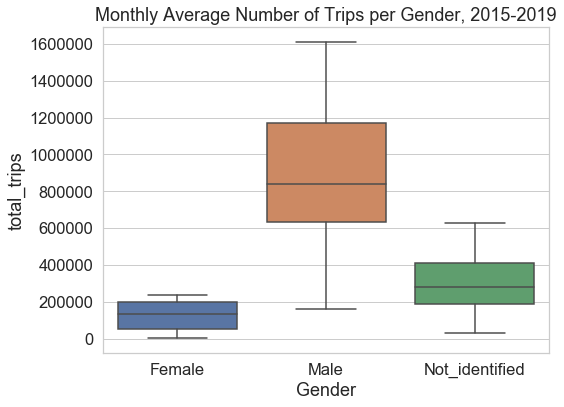

In [15]:
# GENERAL ANALYSIS PER-GENDER
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.boxplot(x="Gender", y="total_trips", data=df2)
plt.title('Monthly Average Number of Trips per Gender, 2015-2019')

Text(0.5, 1.0, 'Monthly Average Number of Trips per Season, 2015-2019')

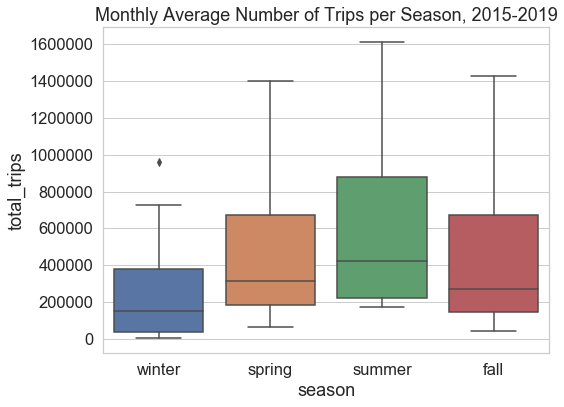

In [16]:
#GENERAL ANALYSIS PER SEASON
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.boxplot(x="season", y="total_trips", data=df2)
plt.title('Monthly Average Number of Trips per Season, 2015-2019')

In [17]:
df2_can=df2[['year', 'Gender', 'total_trips']]
df2_pivot = df2_can.pivot_table(index='Gender',columns=['year'],aggfunc=sum, fill_value=0).T
# cast the Years (the index) to type int
#df_pivot.index = map(float, df_pivot.index)

# let's label the index. This will automatically be the column name when we reset the index
df2_pivot.index.name = 'year'

# reset index to bring the Year in as a column
df2_pivot.reset_index(inplace=True)

#Droping unnecesary column
df2_pivot=df2_pivot.drop(["level_0"], axis=1)

#Converting year column to int type of data
df2_pivot[["year"]] = df2_pivot[["year"]].astype("int")

# view the changes
df2_pivot.head()

Gender,year,Female,Male,Not_identified
0,2015,1316822,6584603,1999443
1,2016,1621342,9238547,2985766
2,2017,1694623,10955046,3714988
3,2018,1484555,11971322,4092462
4,2019,1560308,14052393,4938996


In [18]:
# normalize Female data
norm_female = (df2_pivot['Female'] - df2_pivot['Female'].min()) / (df2_pivot['Female'].max() - df2_pivot['Female'].min())
# normalize Male data
norm_male = (df2_pivot['Male'] - df2_pivot['Male'].min()) / (df2_pivot['Male'].max() - df2_pivot['Male'].min())
# normalize non data
norm_non = (df2_pivot['Not_identified'] - df2_pivot['Not_identified'].min()) / (df2_pivot['Not_identified'].max() - df2_pivot['Not_identified'].min())

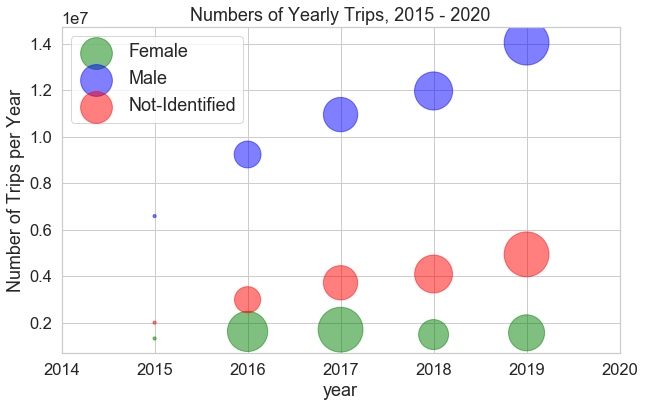

In [19]:
# Female
ax0 = df2_pivot.plot(kind='scatter',
                    x='year',
                    y='Female',
                    figsize=(10, 6),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_female * 2000 + 10,  # pass in weights 
                    xlim=(2014, 2020)
                   )

# Male
ax1 = df2_pivot.plot(kind='scatter',
                    x='year',
                    y='Male',
                    alpha=0.5,
                    color="blue",
                    s=norm_male * 2000 + 10,
                    ax = ax0
                   )

# Non-identified
ax2 = df2_pivot.plot(kind='scatter',
                    x='year',
                    y='Not_identified',
                    alpha=0.5,
                    color="red",
                    s=norm_non * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Trips per Year')
ax0.set_title('Numbers of Yearly Trips, 2015 - 2020')
ax0.legend(['Female', 'Male', 'Not-Identified'], loc='upper left', fontsize='medium')

#### 2.3. Univariate Regression Analysis

Text(0.5, 1.0, 'Total Number of Trips as a Function of Temperature')

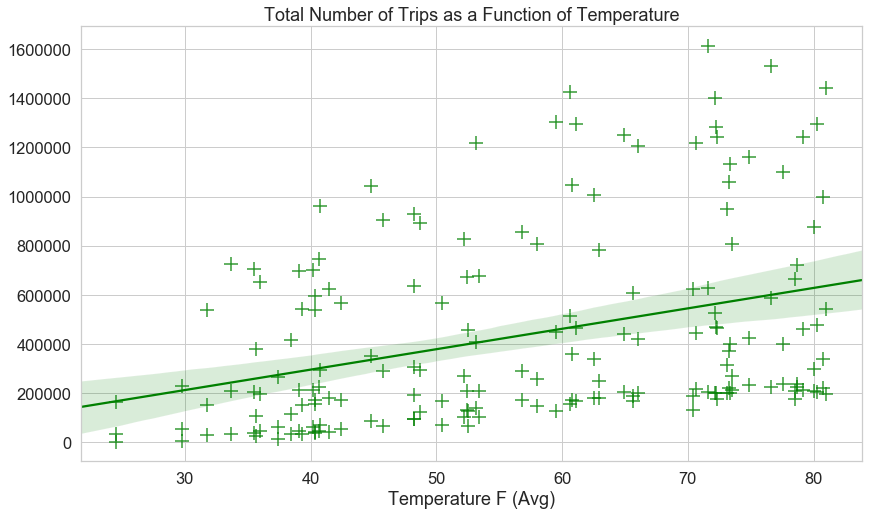

In [20]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='T_Avg', y='total_trips', data=df2, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Temperature F (Avg)', ylabel='')
ax.set_title('Total Number of Trips as a Function of Temperature')

Text(0.5, 1.0, 'Total Number of Trips as a Function of the Number of Taxis')

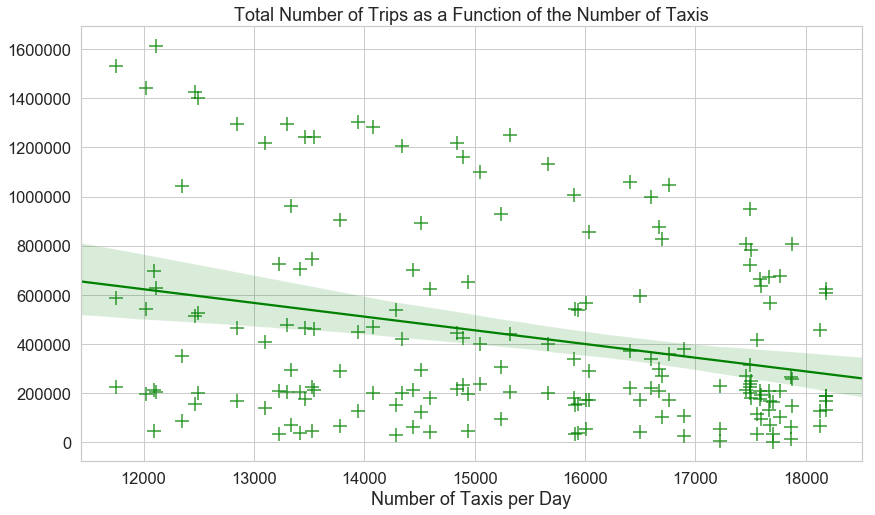

In [21]:
#UNIVARIATE REGRESSIONAN ANALYSIS 2.0
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='taxi_vehicles_per_day', y='total_trips', data=df2, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Number of Taxis per Day', ylabel='')
ax.set_title('Total Number of Trips as a Function of the Number of Taxis')

#### 2.4 Multivariate Regression Analysis

#### Regression Output

In [193]:
#REGRESSION ANALYSIS
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [194]:
X = df2_normalized[["dom_passengers", "int_passengers", "T_Avg", "taxi_vehicles_per_day", "Rain", "Female", "Male", "fall", "spring", "summer"]]
Y = df2_normalized['total_trips']

In [195]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
lm.coef_

array([ 0.03540903, -0.15167597,  0.37402262, -0.25665772, -0.04520068,
       -0.1040947 ,  0.36310183,  0.02023974,  0.01196655, -0.02824786])

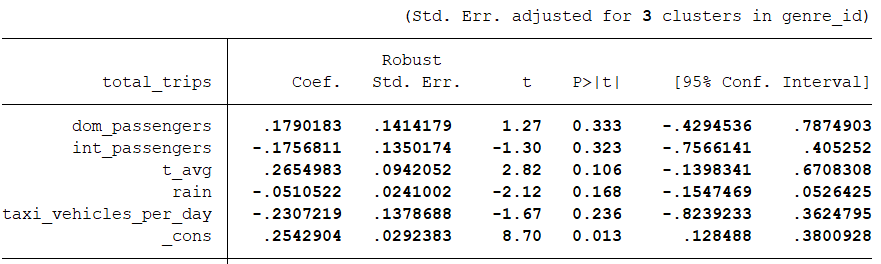

In [182]:
#Importing Outcome from Stata.
#STATA code:
#Generating gender id
#egen gender_id = group(gender), label lname(gender)
#defininng panel data
#xtset gender_id time
#regression panel data style
#xtreg total_trips dom_passengers int_passengers t_avg rain taxi_vehicles_per_day, fe robust

img = 'C:/Users/Maikol Cerda/Desktop/regression.PNG'
Image(filename=img)

#### Model Evaluation: Visualization

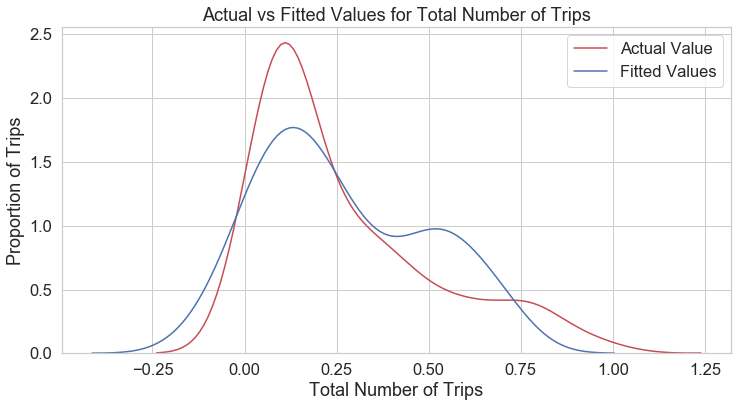

In [197]:
#DISTRIBUTIONAL ANALYSIS OF TRIPS
Y_hat=lm.predict(X)

width=12
height=6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df2_normalized['total_trips'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Total Number of Trips')
plt.xlabel('Total Number of Trips')
plt.ylabel('Proportion of Trips')

plt.show()
plt.close()

In [185]:
cols=['total_trips', "avg_trip_duration", "dom_passengers", "int_passengers", "T_Max", "T_Avg", "T_Min", "H_Max", "H_Avg", "H_Min", "W_Max", "W_Avg", "W_Min",
 "Rain", "rd_trips_per_day", "rd_vehicles_per_day", "rd_unique_drives", "taxi_trips_per_day", "taxi_vehicles_per_day", "taxi_unique_drives"]
cols=['total_trips', "avg_trip_duration", "dom_passengers", "int_passengers", "T_Max", "T_Avg", "T_Min", "H_Max", "H_Avg", "H_Min", "W_Max", "W_Avg", "W_Min",
 "Rain", "rd_trips_per_day", "rd_vehicles_per_day", "rd_unique_drives", "taxi_trips_per_day", "taxi_vehicles_per_day", "taxi_unique_drives"]

np_scaled = df2[cols]

#re-concatenating the rest of variables
df_level = pd.concat([df2['date'],df2['time'],df2['season'],df2["year"],df2['Gender'], pd.DataFrame(np_scaled, columns = cols) ,dummy_variable_gender, dummy_variable_season], axis=1) 

In [186]:
path_2 = "C:/Users/Maikol Cerda/Desktop/citibike_data_month.csv"
df3=pd.read_csv(path_2)

#dummy per season
dummy_variable_season = pd.get_dummies(df3["season"])
dummy_variable_season.head()

df3 = pd.concat([df3 , dummy_variable_season], axis=1)

X_level = df3[["dom_passengers", "int_passengers", "T_Avg", "taxi_vehicles_per_day", "Rain", "fall", "spring", "summer"]]
Y_level = df3['total_trips']

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_level) 
  
poly.fit(X_poly, Y_level) 
lin2 = LinearRegression() 
lin2.fit(X_poly, Y_level)
#lm.fit(X_level,Y_level)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [187]:
Y_hat=lin2.predict(poly.fit_transform(X_level))

Y_hat = pd.DataFrame({'Estimated Trips': Y_hat})

In [188]:
dfplot=pd.concat([df3[['date','total_trips']], Y_hat], axis=1 )
dfplot.set_index('date', inplace=True)

<Figure size 1008x576 with 0 Axes>

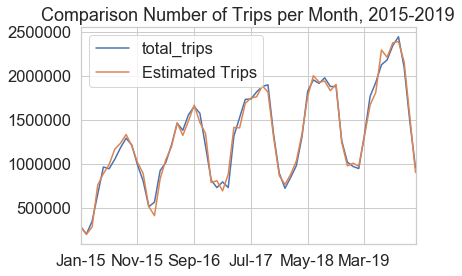

In [35]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

sns.set_style('whitegrid')
dfplot.plot(kind='line')

plt.title('Comparison Number of Trips per Month, 2015-2019')
plt.ylabel('')
plt.xlabel('')
plt.show()

#### Model Evaluation: Fit level

In [198]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, Y_hat)
r_squared = r2_score(Y, Y_hat)

print('The mean square error of price and predicted value is: ', mse)
print('The R-square value is: ', r_squared)

The mean square error of price and predicted value is:  0.006310127234734018
The R-square value is:  0.8910052380219893


## IV. CityBike and its Effect on NYC

### 1. Effect on Pollution

In [199]:
# Read Pollution Database
path_2 = "C:/Users/Maikol Cerda/Desktop/pollution.csv"
pollution=pd.read_csv(path_2)
pollution['Date'] = pd.to_datetime(pollution['Date'], infer_datetime_format=True)
pollution.head()

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
0,2015-01-01,63,PM2.5,Intermediate School 143,36-061-0115,AQS,8,32,7,.,63,31
1,2015-01-02,66,PM2.5,Intermediate School 143,36-061-0115,AQS,8,29,7,.,66,34
2,2015-01-03,56,PM2.5,PS 19,36-061-0128,AQS,13,32,4,11,56,38
3,2015-01-04,55,PM2.5,Intermediate School 143,36-061-0115,AQS,10,24,4,.,55,37
4,2015-01-05,45,PM2.5,Intermediate School 143,36-061-0115,AQS,7,35,3,.,45,20


In [21]:
pollution_2015 = pollution[pollution['Date'].dt.year == 2015]
group_month2=df.groupby(['day_of_year','year']).count()

Text(0.5, 1.0, 'NO2 Pollutant as a Function of Bike-Trips')

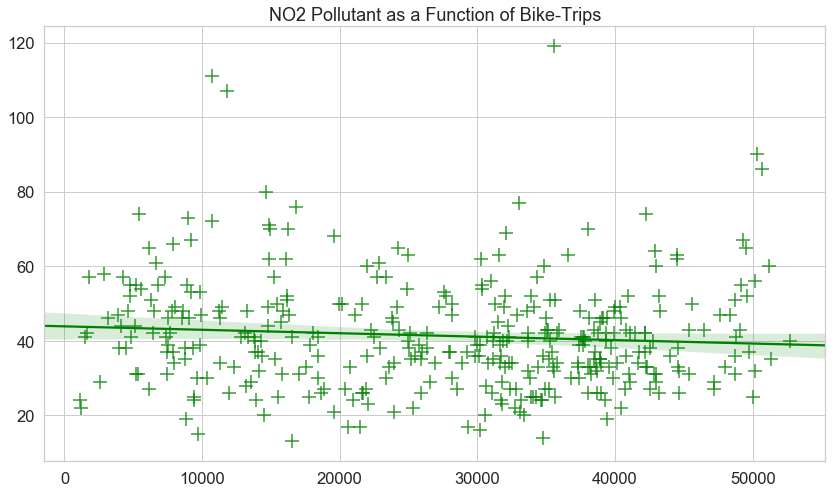

In [25]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x=group_month2['tripduration'], y=pollution_2015['NO2'], color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='', ylabel='')
ax.set_title('NO2 Pollutant as a Function of Bike-Trips')

## 2. Effect on Rental Prices

### 2.1 Getting the Neighborhood of Bike Stations

In [23]:
df.rename(columns = {'start station latitude':'start_station_latitude',
                     'start station longitude':'start_station_longitude'}, inplace = True)
data_stations = df.groupby(['year', 'start_station_latitude', 'start_station_longitude']).size().reset_index(name='Freq')
data_stations['location'] = data_stations['start_station_latitude'].astype(str)+' '+data_stations['start_station_longitude'].astype(str)
data_stations.head()

,year,start_station_latitude,start_station_longitude,Freq,location
0,2015,40.646768,-74.016510,15,40.646768 -74.01651
1,2015,40.678907,-73.941428,712,40.67890679 -73.94142771
2,2015,40.679427,-73.929891,1207,40.6794268 -73.92989109999998
3,2015,40.680011,-73.938475,536,40.6800105 -73.938475
4,2015,40.680342,-73.955769,998,40.68034242 -73.95576894


In [26]:
print('number of stations: ', len(data_stations.index))

number of stations:  511


In [27]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=None)

borough = []

for i in range(0, len(data_stations.index)):
    loc = [data_stations['location'][i]]
    for l in loc:
        sub = str(geolocator.reverse(l))
        borough.append(sub.split(', ')[2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [28]:
neigh=pd.DataFrame(borough, columns = ['neigh' ])
data_stations = pd.concat([data_stations.reset_index(drop=True), neigh.reset_index(drop=True)], axis=1)
data_stations.head()

,year,start_station_latitude,start_station_longitude,Freq,location,neigh
0,2015,40.646768,-74.016510,15,40.646768 -74.01651,Sunset Park
1,2015,40.678907,-73.941428,712,40.67890679 -73.94142771,Bedford-Stuyvesant
2,2015,40.679427,-73.929891,1207,40.6794268 -73.92989109999998,Fulton Street
3,2015,40.680011,-73.938475,536,40.6800105 -73.938475,BEDFORD STUYVESANT/ EXPANDED STUYVEVSANT HEIGH...
4,2015,40.680342,-73.955769,998,40.68034242 -73.95576894,Prospect Heights


### 2.2 Merging with Rental Data

In [30]:
data_stations_neigh = data_stations.groupby(['year', 'neigh']).sum()
#rental houses 2015
path_rental = "C:/Users/Maikol Cerda/Desktop/rental_prices.csv"
rental_prices=pd.read_csv(path_rental)
rental_prices.head()

,areaName,rental_price_2015
0,All Downtown,5000
1,All Midtown,5095
2,All Upper East Side,3870
3,All Upper Manhattan,2350
4,All Upper West Side,5000


In [31]:
combined=data_stations_neigh.merge(rental_prices, left_on='neigh', right_on='areaName')
combined.head()

,start_station_latitude,start_station_longitude,Freq,areaName,rental_price_2015
0,284.788347,-517.597078,11080,BEDFORD STUYVESANT/ EXPANDED STUYVEVSANT HEIGH...,2250
1,203.558438,-370.079472,258724,Battery Park City,6650
2,691.712793,-1257.099522,26449,Bedford-Stuyvesant,2250
3,122.065986,-221.955869,26011,Boerum Hill,3000
4,203.505443,-369.844191,32713,Brooklyn,2500


Text(0.5, 1.0, 'Avg Monthly Rental-Price by NYC Neighborhood as a Function of Bike-Trips')

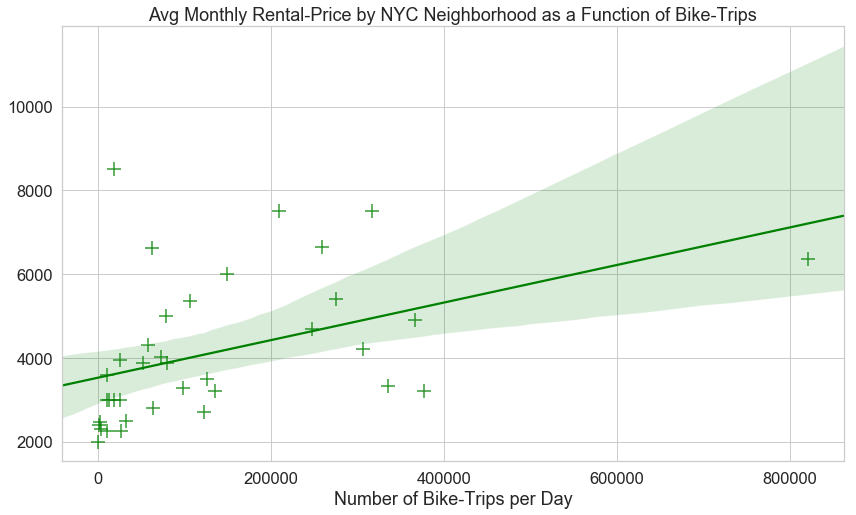

In [32]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='Freq', y='rental_price_2015', data=combined, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Number of Bike-Trips per Day', ylabel='')
ax.set_title('Avg Monthly Rental-Price by NYC Neighborhood as a Function of Bike-Trips')

## 3. Next Expansion: Lyft and Taxis rides

In [67]:
#path_3 = "C:/Users/Maikol Cerda/Desktop/yellow_tripdata_2019-12.csv"
#taxis=pd.read_csv(path_3)
taxis.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [151]:
path_4 = "C:/Users/Maikol Cerda/Desktop/taxi+_zone_lookup.csv"
taxis_zones=pd.read_csv(path_4)
taxis_zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [126]:
taxi_combined=taxis.merge(taxis_zones, left_on='PULocationID', right_on='LocationID')
taxi_combined=taxi_combined[taxi_combined['Borough'] == "Bronx"]

In [150]:
bronx_taxi=taxi_combined.groupby(['PULocationID','Zone','Borough'], as_index=False).count()
bronx_taxi=pd.DataFrame(bronx_taxi[['service_zone','PULocationID','Zone','Borough']])
bronx_taxi=bronx_taxi.sort_values(by=['service_zone'], ascending=False)
bronx_taxi=bronx_taxi.set_index('PULocationID')
bronx_taxi.head()

,service_zone,Zone,Borough
PULocationID,,,
168,1368,Mott Haven/Port Morris,Bronx
247,891,West Concourse,Bronx
69,668,East Concourse/Concourse Village,Bronx
213,639,Soundview/Castle Hill,Bronx
159,636,Melrose South,Bronx


The planned expansion through 2023 will include the following neighborhoods:

The Bronx: **Mott Haven, Melrose, Port Morris, Highbridge**, Claremont, **Morrisania**, Longwood, **Concourse**, and Mt. Eden

# STOP HERE

In [121]:
#!pip install pyshp
#!pip install shapely
#!pip install descartes
import shapefile
from shapely.geometry import Polygon

from descartes.patch import PolygonPatch

In [113]:
!pip install C:/Users/Maikol Cerda/Downloads/Shapely-1.6.4.post2-cp35-cp35m-win_amd64.whl

ERROR: Invalid requirement: 'C:/Users/Maikol'


In [124]:
sf = shapefile.Reader("C:/Users/Maikol Cerda/Desktop/taxi_zones.shp")

In [147]:
def draw_region_map(ax, sf, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    reg_list={'Staten Island':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'EWR':5, 'Brooklyn':6}
    reg_x = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    reg_y = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values()))) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        #sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        #sm.set_array([])
        #plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8), \
        #             boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    ax.set_facecolor(ocean)
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]
        
        if len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center', verticalalignment='center',
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000), horizontalalignment='center', 
                     verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)       

    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [148]:
def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='center', verticalalignment='center')            
        elif len(text) != 0 and loc_id in text:
            #plt.text(x+0.01, y-0.01, str(loc_id), fontsize=12, color="white", bbox=dict(facecolor='black', alpha=0.5))
            eta_x = 0.05*np.cos(theta[text.index(loc_id)])
            eta_y = 0.05*np.sin(theta[text.index(loc_id)])
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x+eta_x, y+eta_y),
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12,
                        arrowprops=dict(facecolor='black', width=3, shrink=0.05))
    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))
    
    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

ShapefileException: Shapefile Reader requires a shapefile or file-like object. (no dbf file found)

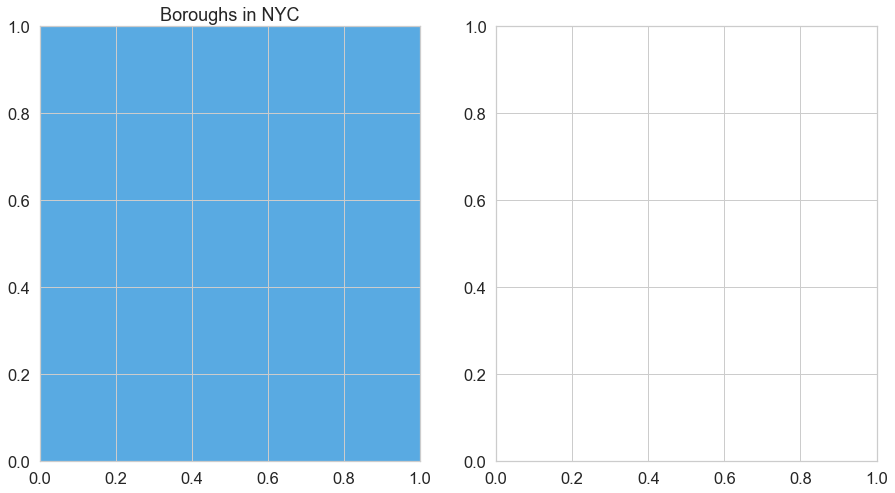

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf)

NameError: name 'draw_zone_map' is not defined

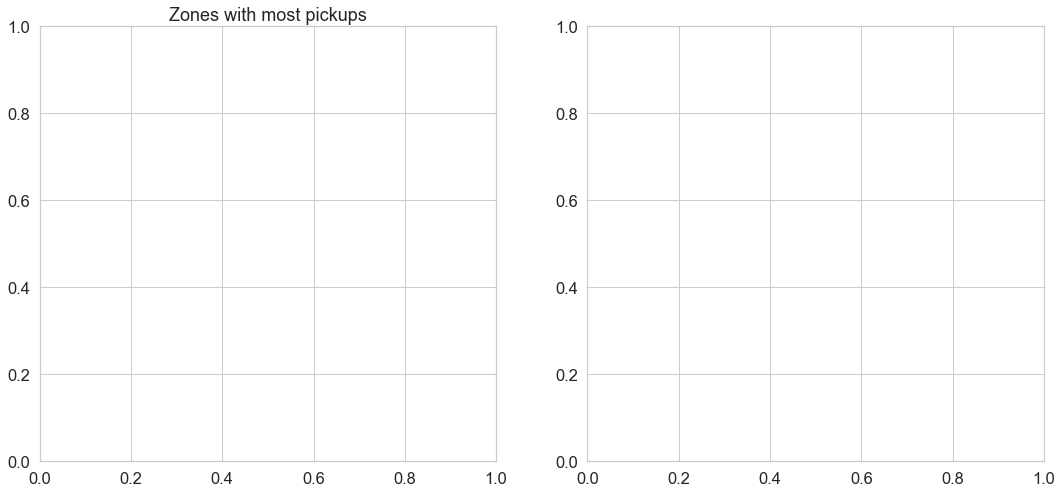

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Zones with most pickups")
draw_zone_map(ax, sf, heat=bronx_taxi, text=bronx_taxi.index.tolist())
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones with most drop-offs")
draw_zone_map(ax, sf, heat=bronx_taxi, text=bronx_taxi.index.tolist())

## Seasonality

#### Daily in a week (weekends)
#### Monthly in a year (summer)

In [34]:
#TYPES OF SEASONALITY
additive = {"op": lambda a,b: a+b, "inv": lambda a,b: a-b}
multiplicative = {"op": lambda a,b: a*b, "inv": lambda a,b: a/b}

#### Choosing the type of seasonality to use

In [35]:
seasonality_model = additive
#seasonality_model = multiplicative

#### Defining both type of seasonality observed in the data

In [37]:
categorize_by_week_of_year = lambda df: df.index.weekofyear // 7
categorize_by_day_of_week = lambda df: df.index.dayofweek

In [38]:
def compute_seasonality(series, categorization):
    """
    Computes seasonal component parameters based on provided series.
    
    :type series: pd.Series
    :categorization: Parameter. Function used to split values into various periods of the season.
    :type categorization: pd.DataFrame -> some categorical type, eg. int
    """
    df = pd.DataFrame()
    df["values"] = series
    df.index = series.index
    df["cat"] = categorization(df)
    return df.groupby(by="cat")["values"].mean()

## PREDICTION 

## First Data

In [12]:
#reading data
path_1 = "C:/Users/Maikol Cerda/Desktop/df_hour3.csv"
df2=pd.read_csv(path_1)
#df2.tail()

In [13]:
df2=df2[['starttime','tripduration']]
#df2['starttime'] = pd.to_datetime(df2['starttime'], infer_datetime_format=True)

In [14]:
#df4=df2
df2['starttime'] = pd.to_datetime(df2['starttime'], infer_datetime_format=True)
df2.index = df2['starttime'] 
#df4=df4[['starttime','tripduration']]

In [15]:
df2=df2.resample('h').count()['tripduration']
df2=df2.reset_index()
df2.head()

,starttime,tripduration
0,2018-09-01 00:00:00,757
1,2018-09-01 01:00:00,574
2,2018-09-01 02:00:00,367
3,2018-09-01 03:00:00,217
4,2018-09-01 04:00:00,156


In [16]:
#Saving data
df2.to_csv('df_hour3_hourly.csv')

## Merging Data

In [17]:
path_1 = "C:/Users/Maikol Cerda/Desktop/df_hour1_hourly.csv"
df1_h=pd.read_csv(path_1)
path_2 = "C:/Users/Maikol Cerda/Desktop/df_hour2_hourly.csv"
df2_h=pd.read_csv(path_2)
path_3 = "C:/Users/Maikol Cerda/Desktop/df_hour3_hourly.csv"
df3_h=pd.read_csv(path_3)

frames = [df1_h, df2_h, df3_h]

df_hourly= pd.concat(frames)

In [20]:
# Python
#!pip install fbprophet
from fbprophet import Prophet

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [21]:
df4=df_hourly[['starttime','tripduration']]
df4.rename(columns = {'starttime':'ds', 'tripduration': 'y'}, inplace = True)

m = Prophet()
m.fit(df4)

# Python
future = m.make_future_dataframe(periods=365)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds
43849,2020-01-26 23:00:00
43850,2020-01-27 23:00:00
43851,2020-01-28 23:00:00
43852,2020-01-29 23:00:00
43853,2020-01-30 23:00:00


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43849,2020-01-26 23:00:00,42.735202,-1186.474729,1339.485021
43850,2020-01-27 23:00:00,314.279379,-1035.642506,1624.813854
43851,2020-01-28 23:00:00,381.726333,-965.174679,1741.452963
43852,2020-01-29 23:00:00,399.358604,-903.311363,1792.761029
43853,2020-01-30 23:00:00,332.128768,-1043.410032,1613.140817


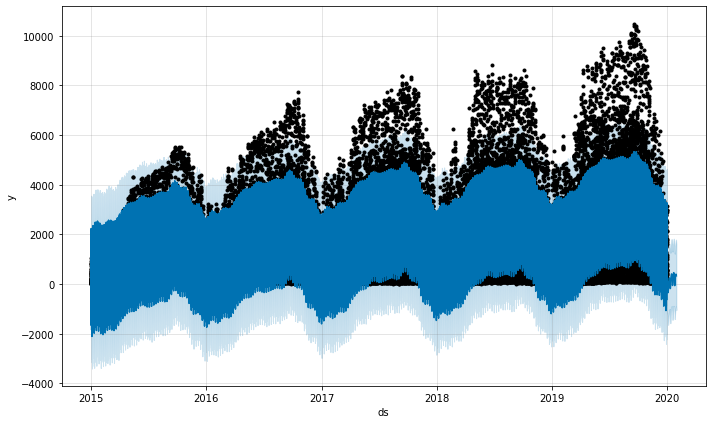

In [23]:
fig1 = m.plot(forecast)

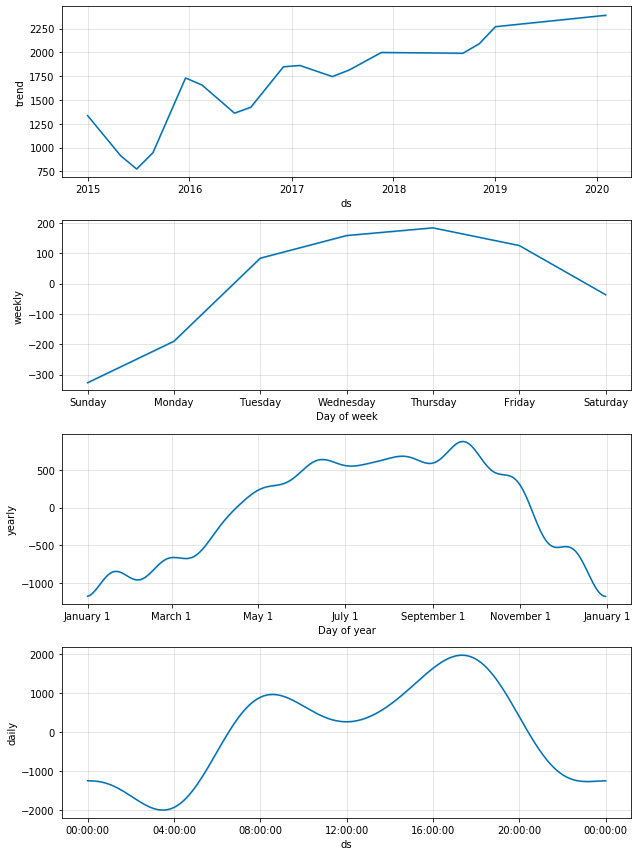

In [24]:
fig2 = m.plot_components(forecast)


## Next Steps

### 1. Clean data from seasonality
### 2. Applied Econometrics Time Series Methods to predict demand (SARIMA, VAR, Holt Winter Methods)
### 3. Machine Learning Models (Lnear regression, Bayesian Ridge regression)
### 4. Neural Networks (RNN and LSTMs)

### 5. Geo-data??

In [46]:
from fbprophet.diagnostics import cross_validation

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred))/y_true) *100

#prophet = Prophet(growth='linear')
prophet = Prophet(growth='linear', seasonality_mode='multiplicative',
                 changepoint_prior_scale=60,
                 seasonality_prior_scale=50,
#                 holiday_prior_scale=20,
                 daily_seasonality=False,
                 weekly_seasonality=False,
                 yearly_seasonality=False,
                 ).add_seasonality(
                    name='monthly',
                    period=30.5,
                    fourier_order=55
                ).add_seasonality(
                    name='weekly',
                    period=7,
                    fourier_order=50
                ).add_seasonality(
                    name='daily',
                    period=1,
                    fourier_order=15
                ).add_seasonality(
                    name='yearly',
                    period=365.25,
                    fourier_order=20
                ).add_seasonality(
                    name='quartely',
                    period=365.25/4,
                    fourier_order=5,
                    prior_scale =15
                )

prophet.fit(df4)

#specified frquency is in hours because we have hourly data
future=prophet.make_future_dataframe(freq='H', periods=24*365)

#predicting the values
forcast = prophet.predict(future)

#predicting in hour periods
cv_results=cross_validation(prophet, initial='12000', period='3600 hours', horizon='168 hours')

#calculating the MAPE
mape_baseline= mean_absolute_percentage_error(cv_results.y, cv_results.yhat)



INFO:fbprophet:Making 13 forecasts with cutoffs between 2015-01-19 23:00:00 and 2019-12-24 23:00:00
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in true_divide



In [47]:
mape_baseline

inf

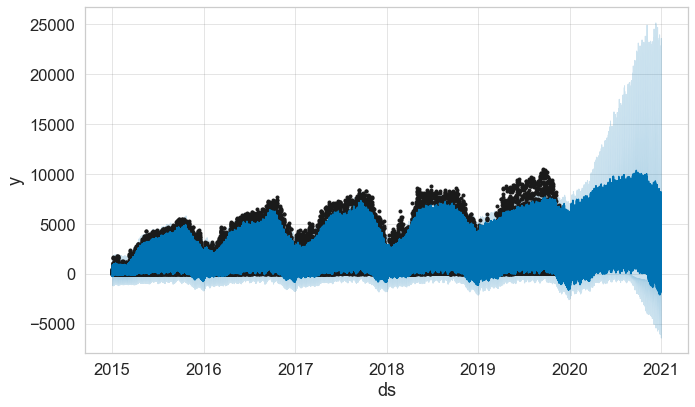

In [48]:
fig1 = prophet.plot(forcast)

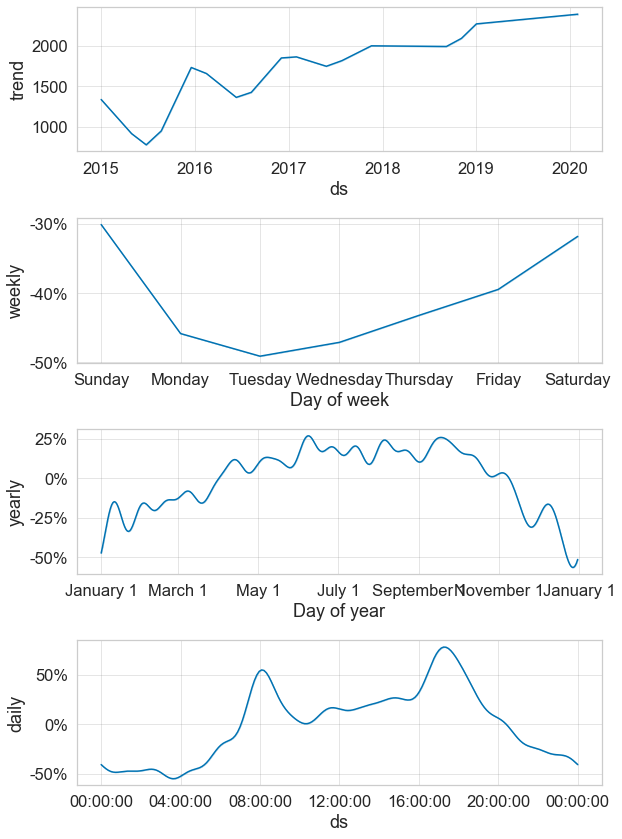

In [49]:
fig2 = prophet.plot_components(forecast)

In [45]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
df_hourly(kind='line')

plt.title('Number of Trips per Day, 2015-2019')
plt.ylabel('')
plt.xlabel('')

plt.show()

TypeError: 'DataFrame' object is not callable

<Figure size 864x432 with 0 Axes>

In [37]:
df_hourly=df_hourly[['starttime','tripduration']]

In [41]:
df_hourly['starttime'] = pd.to_datetime(df_hourly['starttime'], infer_datetime_format=True)